# Maze 

In [22]:
import numpy as np
from copy import copy, deepcopy

obstaculo = "#"
cur = "X"
objetivo = "O"
up_symbol = "↑"
down_symbol = '↓'
left_symbol = '←'
right_symbol = '→'

class Maze:
    def __init__(self, lines:int, columns:int, obstacle=None, array=None) -> None:
        if not array is None: #apenas para o print_sequence
            self.maze = array
            self.lines, self.columns = self.maze.shape
        else:
            self.maze = np.empty((lines, columns), dtype= 'object') 
            self.lines, self.columns = (lines, columns)
            #ATUAL
            self.cur_line = self.lines - 1 
            self.cur_col = 0 
            self.maze[self.cur_line, self.cur_col] = cur
            
            #TARGET
            self.target_line = 0
            self.target_col = self.columns - 1
            self.maze[self.target_line, self.target_col] = objetivo
            
        self.last_move = ['last', float('inf')]
        self.cur_move = ['cur', float('-inf')]
        
        #se obstacle != None gera-se obstaculos
        if isinstance(obstacle, list):
            self.generate_obstacles(obstacle)
            
        self.move_history = [copy(self.maze)]
        
    def __str__(self) -> str:
        string = '+' + '-'*(2*self.columns - 1) + '+ \n'
        for line in self.maze:
            string += '|'
            for cell in line:
                if cell is None:
                    string += ' '
                else:
                    string += cell
                string += '|'
            string += '\n'
            string += '+' + '-'*(2*self.columns - 1) + '+ \n'
        return string
    
    def __eq__(self, other:object) -> bool:
        return np.array_equal(self.maze, other) 
    
    def __hash__(self):
        #permite usar o estado do labirinto em um conjunto (set)
        return hash(str([item for sublist in self.maze for item in sublist]))
    
    def copy(self):
        return deepcopy(self)

    def generate_obstacles(self, obstacles:list) -> None:
        for line, col in obstacles:
            self.maze[line, col] = obstaculo

    def children(self) -> list:
        functions = [self.up, self.down, self.left, self.right]
        children = []
        for function in functions:
            child = function()
            if child:
                children.append(child)
        return children
    
    # Funções de movimento
    def up(self):
        copied = self.copy()
        
        if (copied.cur_line == 0 or #na barreira superior
            copied.maze[copied.cur_line - 1, copied.cur_col] not in {None, objetivo} or #se a casa acima nao for casa válida
            (copied.maze[copied.cur_line - 1, copied.cur_col] == objetivo and np.count_nonzero(copied.maze == None) > 0) or #se tentar chegar ao target mesmo tendo casas nao visitadas
            (copied.cur_move[0] != 'up' and copied.cur_move[1] == copied.last_move[1])): #se a jogada anterior tiver o mesmo comprimento
            return None
        
        else:
            copied.maze[copied.cur_line, copied.cur_col] = up_symbol
            copied.maze[copied.cur_line - 1, copied.cur_col] = cur
            copied.cur_line -= 1
            
            if copied.cur_move[0] == 'up': copied.cur_move[1] += 1
            else: 
                copied.last_move = copied.cur_move
                copied.cur_move = ['up', 1]
                
            copied.move_history.append(copy(copied.maze))
        return copied
    
    def down(self):
        copied = self.copy()
        if (copied.cur_line == copied.lines - 1 or #na barreira inferior
            copied.maze[copied.cur_line + 1, copied.cur_col] not in {None, objetivo} or #se a casa abaixo nao for casa válida
            (copied.maze[copied.cur_line + 1, copied.cur_col] == objetivo and np.count_nonzero(copied.maze == None) > 0) or #se tentar chegar ao target mesmo tendo casas nao visitadas
            (copied.cur_move[0] != 'down' and copied.cur_move[1] == copied.last_move[1])): #se a jogada anterior tiver o mesmo comprimento
            return None
        else:
            copied.maze[copied.cur_line, copied.cur_col] = down_symbol
            copied.maze[copied.cur_line + 1, copied.cur_col] = cur
            copied.cur_line += 1
            
            if copied.cur_move[0] == 'down': copied.cur_move[1] += 1
            else: 
                copied.last_move = copied.cur_move
                copied.cur_move = ['down', 1]
                
            copied.move_history.append(copy(copied.maze))
        return copied
    
    def left(self):
        copied = self.copy()
        if (copied.cur_col == 0 or #na barreira lateral
            copied.maze[copied.cur_line, copied.cur_col - 1] not in {None, objetivo} or #se a casa esquerda nao for casa válida
            (copied.maze[copied.cur_line, copied.cur_col - 1] == objetivo and np.count_nonzero(copied.maze == None) > 0) or #se tentar chegar ao target mesmo tendo casas nao visitadas
            (copied.cur_move[0] != 'left' and copied.cur_move[1] == copied.last_move[1])): #se a jogada anterior tiver o mesmo comprimento
            return None
        else:
            copied.maze[copied.cur_line, copied.cur_col] = left_symbol
            copied.maze[copied.cur_line, copied.cur_col - 1] = cur
            copied.cur_col -= 1
            
            if copied.cur_move[0] == 'left': copied.cur_move[1] += 1
            else: 
                copied.last_move = copied.cur_move
                copied.cur_move = ['left', 1]
                
            copied.move_history.append(copy(copied.maze))
        return copied
    
    def right(self):
        copied = self.copy()
        if (copied.cur_col == copied.columns - 1 or #na barreira lateral
            copied.maze[copied.cur_line, copied.cur_col + 1] not in {None, objetivo} or #se a casa direita nao for casa válida
            (copied.maze[copied.cur_line, copied.cur_col + 1] == objetivo and np.count_nonzero(copied.maze == None) > 0) or #se tentar chegar ao target mesmo tendo casas nao visitadas
            (copied.cur_move[0] != 'right' and copied.cur_move[1] == copied.last_move[1])): #se a jogada anterior tiver o mesmo comprimento
            return None
        else:
            copied.maze[copied.cur_line, copied.cur_col] = right_symbol
            copied.maze[copied.cur_line, copied.cur_col + 1] = cur
            copied.cur_col += 1
            
            if copied.cur_move[0] == 'right': copied.cur_move[1] += 1
            else: 
                copied.last_move = copied.cur_move
                copied.cur_move = ['right', 1]
                
            copied.move_history.append(copy(copied.maze))
        return copied
    
    def is_solved(self) -> bool: 
        return np.count_nonzero(self.maze == None) == 0 and self.cur_line == self.target_line and self.cur_col == self.target_col

def print_sequence(node=None) -> None:
    if node is None:
        print('There is no solution')
        
    else:
        print("Steps: ", len(node.move_history) - 1)
        # prints the sequence of states
        for maze in node.move_history:
            print(Maze(maze.shape[0], maze.shape[1], array=maze))
            
def steps(node= None):
    return  len(node.move_history) - 1

def final_board(node=None):
    last = node.move_history[-1]
    print(Maze(last.shape[0], last.shape[1], array=last)) 

In [23]:
from math import sqrt

def distancia_euclidiana(maze:Maze) -> float:
    return sqrt((maze.target_line - maze.cur_line) ** 2 + (maze.target_col - maze.cur_col) ** 2)

def distancia_manhattan(maze:Maze) -> int:
    return abs(maze.target_line - maze.cur_line) + abs(maze.target_col - maze.cur_col)

In [24]:
from collections import deque
import heapq, time, random

easy_mazes = [
    Maze(3,3),
    Maze(6,6, obstacle= [(0,0), (0,1), (0,2)]),
    Maze(6,6, obstacle= [(3,1), (3,2), (1,5)]),
    Maze(6,6, obstacle= [(4,1), (5,1), (1,3)]),
    Maze(6,6, obstacle= [(2,2), (4,3), (5,3)]),
    Maze(6,6, obstacle= [(0,4)]),
    Maze(6,6, obstacle= [(3,1), (4,3), (4,4)])
]

medium_mazes = [
    Maze(5,8, obstacle= [(2,0), (3,0), (0,6), (1,6)]),
    Maze(5,8, obstacle= [(1,1), (2,1), (4,6), (4,7)]),
    Maze(5,8, obstacle= [(0,0), (0,1), (0,2), (4,1)]),
    Maze(5,8, obstacle= [(0,0), (0,1), (4,6), (4,7)]),
    Maze(5,8, obstacle= [(0,6), (1,6), (2,4), (3,4)]),
    Maze(5,8, obstacle= [(0,2), (1,2), (2,4), (3,4)]),
    Maze(5,8, obstacle= [(1,3), (1,4), (1,5), (3,4)]),
    Maze(5,8, obstacle= [(0,2), (0,3)])
]

hard_mazes = [
    Maze(7,7, obstacle= [(0,3), (1,1)]),
    Maze(7,7, obstacle= [(6,1), (5,3), (3,3), (3,4)]),
    Maze(7,7, obstacle= [(2,0), (2,1), (5,0), (5,1)]),
    Maze(7,7, obstacle= [(2,0), (3,0), (3,2), (4,2)]),
    Maze(7,7, obstacle= [(2,5), (3,3), (6,5), (6,6)]),
    Maze(7,7, obstacle= [(1,1), (1,2), (3,3), (4,1)]),
    Maze(7,7, obstacle= [(3,3), (4,3), (3,6), (4,6)]),
    Maze(7,7, obstacle= [(4,1), (4,2), (5,6), (6,6)]),
    Maze(7,7, obstacle= [(3,1), (4,1), (3,6), (4,6)]),
    Maze(7,7, obstacle= [(6,1), (4,2), (4,4), (3,4)]),
    Maze(7,7, obstacle= [(4,2), (5,2), (4,5), (5,5)]),
    Maze(7,7, obstacle= [(6,1), (6,2), (1,6), (2,4)])
]

#DFS
def depth_first_search(initial_maze:Maze): #return é maze, numero de passos e tempo
    stack = deque([initial_maze]) 
    visited = set()
    steps = 0
    inicio = time.time()
    while stack:
        node = stack.pop() #get the last element that came in
        steps += 1
        if node.is_solved():
            return (node, steps, time.time() - inicio)
        visited.add(node)
        children = node.children()
        for child in children:
            if child not in visited:
                stack.append(child)
    return (None, steps, time.time() - inicio)

#Limited DFS
def depth_limited_search(initial_maze:Maze, depth_limit:int): #return é maze, numero de passos e tempo
    stack = deque([(initial_maze, 0)])  
    visited = set()
    steps = 0
    inicio = time.time()
    while stack:
        node, depth = stack.pop()
        steps += 1
        if depth < depth_limit:
            if node.is_solved():
                return (node, steps, time.time() - inicio)
            visited.add(node)
            children = node.children()
            for child in children:
                if child not in visited:
                    stack.append([child, depth + 1])
        else: break
    return (None, steps, time.time() - inicio)

#Iterative Deepening search
def iterative_deepening_search(initial_maze, depth_limit): #return é maze, numero de passos e tempo
    steps = 0
    inicio = time.time()
    for i in range(depth_limit):
        result, i_steps, *_ = depth_limited_search(initial_maze, i)
        steps += i_steps
        if result:
            return (result, steps, time.time() - inicio)
    return (None, steps, time.time() - inicio)

#BFS
def breadth_first_search(initial_maze): #return é maze, numero de passos e tempo
    queue = deque([initial_maze])  
    steps = 0
    inicio = time.time()
    while queue:
        maze = queue.popleft()   #primeiro elemento da fila (por ordem de chegada - FIFO)
        steps += 1
        if maze.is_solved(): 
            return (maze, steps, time.time() - inicio)
        for child in maze.children():   # ver as children deste nó
            queue.append(child)        
    return (None, steps, time.time() - inicio)

#Greedy
def greedy_search(initial_maze:Maze, heuristica): #return é maze, numero de passos e tempo
    setattr(Maze, "__lt__", lambda self, other: heuristica(self) < heuristica(other)) # Define um método de comparação para os mazes com base na função heurística fornecida
    priority_queue = [initial_maze]
    visited = set()
    steps = 0
    inicio = time.time()
    while priority_queue:
        atual = heapq.heappop(priority_queue) 
        steps += 1
        if atual.is_solved(): 
            return (atual, steps, time.time() - inicio)
        visited.add(atual) #labirinto visitado
        children = atual.children()
        for child in children:
            if child not in visited:
                heapq.heappush(priority_queue, child)
    return (None, steps, time.time() - inicio)

def a_star_search(maze_inicial, heuristica): #return é maze, numero de passos e tempo
        return greedy_search(maze_inicial, lambda hrst: heuristica(maze_inicial) + len(maze_inicial.move_history)) #-1=estado inicial

def  weighted_a_star_search(maze_inicial, heuristica, w): #return é maze, numero de passos e tempo
        return greedy_search(maze_inicial, lambda hrst: w*heuristica(maze_inicial) + len(maze_inicial.move_history) - 1)

import random
import pandas as pd

maze_easy = random.choice(easy_mazes)
maze_medium = random.choice(medium_mazes)
maze_hard = random.choice(hard_mazes)



In [25]:
depth_first = depth_first_search(maze_medium)
breadth_first =  breadth_first_search(maze_medium)
depth_limited = depth_limited_search(maze_medium, 50)
iterative_deepening = iterative_deepening_search(maze_medium, 50)
blind = [depth_first, breadth_first, iterative_deepening, depth_limited]

In [26]:
greedy_search_euclidiana = greedy_search(maze_medium, distancia_euclidiana)
greedy_search_manhattan = greedy_search(maze_medium, distancia_manhattan)
a_star_search_euclidiana = a_star_search(maze_medium, distancia_euclidiana)
a_star_search_manhattan = a_star_search(maze_medium, distancia_manhattan)
weighted_a_star_search_euclidiana = weighted_a_star_search(maze_medium, distancia_euclidiana, 0.5)
weighted_a_star_search_manhattan = weighted_a_star_search(maze_medium, distancia_manhattan, 0.5)

algoritmos = [greedy_search_euclidiana, greedy_search_manhattan, a_star_search_euclidiana, a_star_search_manhattan, weighted_a_star_search_euclidiana, weighted_a_star_search_manhattan]

# Testes Maze

Abaixo temos o board que será analizado, selecionamos um tabuleiro de nível médio para que seja possível se comparar efetivamente todos os algoritmos.

In [27]:
final_board(maze_medium)

+---------------+ 
| | | | | | | |O|
+---------------+ 
| | | |#|#|#| | |
+---------------+ 
| | | | | | | | |
+---------------+ 
| | | | |#| | | |
+---------------+ 
|X| | | | | | | |
+---------------+ 



Supondo que há uma única solução para o tabuleiro, abaixo temos o que será a solução que todos os algoritmos encontrarão.

In [28]:
final_board(depth_first[0])

+---------------+ 
|→|→|→|→|→|→|↓|X|
+---------------+ 
|↑|←|←|#|#|#|↓|↑|
+---------------+ 
|→|→|↑|↓|←|←|→|↑|
+---------------+ 
|↑|←|←|←|#|↑|←|←|
+---------------+ 
|→|→|→|→|→|→|→|↑|
+---------------+ 



In [29]:
def tabelas(lista):
    nos = []
    tempo = []
    passos = []
    for algoritmo in lista:
        nos.append(algoritmo[1])
        tempo.append(algoritmo[2])
        passos.append(steps(algoritmo[0]))
    return nos, tempo, passos

Tabela comparativa relacionando o desempenho dos algoritmos não informados, será notado o número de nós visitadosm, variação de tempo e número de passos até a solução (Pelo que como há uma unica solução, todos terão o mesmo número de passos). 
* O board é o de nível médio
* Foi definida uma profundidade máxima de 50 para o "iterative deepening" e "depth limited"

In [30]:
results = tabelas(blind)
tabela_blind = {"algoritmos": ["depth_first_search", "breadth_first", "iterative_deepening", "depth_limited"], 
                               "Nós_Visitados" : results[0], 
                               "tempo" : results[1],
                                "Passos": results[2]}


df = pd.DataFrame(tabela_blind)
df

,algoritmos,Nós_Visitados,tempo,Passos
0,depth_first_search,168,0.184776,35
1,breadth_first,8925,7.549649,35
2,iterative_deepening,1712,1.284116,35
3,depth_limited,168,0.145601,35


Tabela comparativa relacionando o desempenho dos algoritmos informados e as heurísticas implementadas, será notado o número de nós visitados, variação de tempo e número de passos até a solução (Pelo que como há uma unica solução, todos terão o mesmo número de passos). 
* O board é o de nível médio
* O peso definido para o weighted A* é indiferente

In [31]:
informed = tabelas(algoritmos)

tabela_informed ={"Algoritmos": ["greedy_search_euclidiana", "greedy_search_manhattan", 
                                 "a_star_search_euclidiana", "a_star_search_manhattan", 
                                 "weighted_a_star_search_euclidiana", "weighted_a_star_search_manhattan"],
                               "Nós Visitados" : informed[0], 
                               "Tempo" : informed[1],
                                "Passos": informed[2] }

info = pd.DataFrame(tabela_informed)

info

,Algoritmos,Nós Visitados,Tempo,Passos
0,greedy_search_euclidiana,8308,7.281116,35
1,greedy_search_manhattan,7300,6.226764,35
2,a_star_search_euclidiana,1539,1.308535,35
3,a_star_search_manhattan,1539,1.308812,35
4,weighted_a_star_search_euclidiana,1539,1.316826,35
5,weighted_a_star_search_manhattan,1539,1.308102,35


In [46]:

pesos = [i+0.5 for i in range(8)]
tempo_euclidiana = [weighted_a_star_search(maze_medium, distancia_euclidiana, j)[2] for j in pesos]
tempo_manhattan = [weighted_a_star_search(maze_medium, distancia_manhattan, j)[2] for j in pesos]


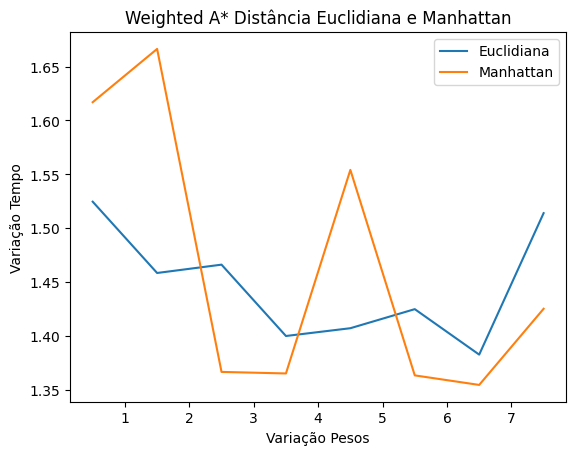

In [47]:
import matplotlib.pyplot as plt

plt.plot(pesos, tempo_euclidiana, pesos, tempo_manhattan)
plt.title('Weighted A* Distância Euclidiana e Manhattan')
plt.xlabel('Variação Pesos') 
plt.ylabel('Variação Tempo')
plt.legend({'Euclidiana','Manhattan'})


